In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import joblib
from fastapi import FastAPI

KOI_raw_data = pd.read_csv('Data/KOI_data_cumulative_2025.09.22_07.28.01.csv',skiprows=144)
TOI_raw_data = pd.read_csv('Data/TOI_data_2025.09.22_07.28.57.csv', skiprows=90)
K2_raw_data = pd.read_csv('Data/K2_data_k2pandc_2025.09.22_07.31.46.csv',skiprows=298)

In [2]:
useless_columns_KOI = [
    'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
    'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_parm_prov', 'koi_sparprov',
    'koi_vet_stat', 'koi_vet_date', 'koi_comment', 'koi_tce_delivname', 'koi_tce_plnt_num', 'ra', 'dec',
    'koi_quarters', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1',
    'koi_time0_err2', 'koi_limbdark_mod', 'koi_fittype', 'koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec',
    'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 'koi_dikco_mra_err',
    'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 'koi_dikco_msky_err', 'koi_fwm_stat_sig', 'koi_fwm_sra',
    'koi_fwm_sra_err', 'koi_fwm_sdec', 'koi_fwm_sdec_err', 'koi_fwm_srao', 'koi_fwm_srao_err', 'koi_fwm_sdeco',
    'koi_fwm_sdeco_err', 'koi_fwm_prao', 'koi_fwm_prao_err', 'koi_fwm_pdeco', 'koi_fwm_pdeco_err', 'koi_period_err1',
    'koi_period_err2', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp_err1', 'koi_longp_err2', 'koi_impact_err1',
    'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_ingress_err1', 'koi_ingress_err2',
    'koi_depth_err1', 'koi_depth_err2', 'koi_ror_err1', 'koi_ror_err2', 'koi_srho_err1', 'koi_srho_err2',
    'koi_prad_err1', 'koi_prad_err2', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq_err1',
    'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_dor_err1', 'koi_dor_err2', 'koi_steff_err1',
    'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad_err1',
    'koi_srad_err2', 'koi_smass_err1', 'koi_smass_err2', 'koi_sage_err1', 'koi_sage_err2',
]
useless_columns_TOI = ['toi','raerr1','raerr2','decerr1','decerr2','st_pmralim','st_pmrasymerr','st_pmdeclim','st_pmdecsymerr','pl_tranmidlim','pl_tranmidsymerr','pl_orbperlim','pl_orbpersymerr','pl_trandurhlim','pl_trandurhsymerr','pl_trandeplim','pl_trandepsymerr','pl_radelim','pl_radesymerr','pl_insolerr1','pl_insolerr2',
                   'pl_insollim','pl_insolsymerr','pl_eqterr1','pl_eqterr2','pl_eqtlim','pl_eqtsymerr','st_tmaglim','st_tmagsymerr', 'st_distlim','st_distsymerr','st_tefflim','st_teffsymerr','st_logglim','st_loggsymerr','st_radlim','st_radsymerr','toi_created','rowupdate','rowid','pl_pnum','st_pmraerr2','st_pmdecerr2',
                   'pl_tranmiderr2','pl_orbpererr2','pl_trandurherr2','pl_trandeperr2','pl_radeerr2','st_tmagerr2','st_disterr2','st_tefferr2','st_loggerr2','st_raderr2','rastr','decstr']

useless_columns_K2 = ['disp_refname','discoverymethod','disc_year','disc_refname','disc_pubdate','disc_locale','disc_facility','disc_telescope','disc_instrument','pul_flag','ptv_flag','tran_flag','ast_flag','obm_flag','micro_flag','etv_flag','ima_flag','dkin_flag','soltype','pl_controv_flag','pl_refname','pl_orbperlim','pl_orbsmax',
                      'pl_orbsmaxerr1','pl_orbsmaxerr2','pl_orbsmaxlim','pl_radelim','pl_radjlim','pl_masse','pl_masseerr1','pl_masseerr2','pl_masselim','pl_massj','pl_massjerr1','pl_massjerr2','pl_massjlim','pl_msinie','pl_msinieerr1','pl_msinieerr2','pl_msinielim','pl_msinij','pl_msinijerr1','pl_msinijerr2','pl_msinijlim',
                      'pl_cmasse','pl_cmasseerr1','pl_cmasseerr2','pl_cmasselim','pl_cmassj','pl_cmassjerr1','pl_cmassjerr2','pl_cmassjlim','pl_bmasse','pl_bmasse','pl_bmasseerr1','pl_bmasseerr2','pl_bmasselim','pl_bmassj','pl_bmassjerr1','pl_bmassjerr2','pl_bmassjlim','pl_bmassprov','pl_dens','pl_denserr1','pl_denserr2','pl_denslim',
                      'pl_orbeccen','pl_orbeccenerr1','pl_orbeccenerr2','pl_orbeccenlim','pl_insol','pl_insolerr1','pl_insolerr2','pl_insollim','pl_eqt','pl_eqterr1','pl_eqterr2','pl_eqtlim','pl_orbincl','pl_orbinclerr1','pl_orbinclerr2','pl_orbincllim','pl_tranmidlim','pl_tsystemref','ttv_flag','pl_imppar','pl_impparerr1',
                      'pl_impparerr2','pl_impparlim','pl_trandep','pl_trandeperr1','pl_trandeperr2','pl_trandeplim','pl_trandurerr1','pl_trandurerr2','pl_trandurlim','pl_ratdor','pl_ratdorerr1','pl_ratdorerr2','pl_ratdorlim','pl_ratrorerr1','pl_ratrorerr2','pl_ratrorlim','pl_occdep','pl_occdeperr1','pl_occdeperr2','pl_occdeplim',
                      'pl_orbtper','pl_orbtpererr1','pl_orbtpererr2','pl_orbtperlim','pl_orblper','pl_orblpererr1','pl_orblpererr2','pl_orblperlim','pl_rvamp','pl_rvamperr1','pl_rvamperr2','pl_rvamplim','pl_projobliq','pl_projobliqerr1','pl_projobliqerr2','pl_projobliqlim','pl_trueobliq','pl_trueobliqerr1','pl_trueobliqerr2',
                      'pl_trueobliqlim','st_refname','st_spectype','st_tefferr1','st_tefferr2','st_tefflim','st_radlim','st_mass','st_masserr1','st_masserr2','st_masslim','st_met','st_meterr1','st_meterr2','st_metlim','st_metratio','st_lum','st_lumerr1','st_lumerr2','st_lumlim','st_loggerr1','st_loggerr2','st_logglim','st_age',
                      'st_ageerr1','st_ageerr2','st_agelim','st_dens','st_denserr1','st_denserr2','st_denslim','st_vsin','st_vsinerr1','st_vsinerr2','st_vsinlim','st_rotp','st_rotperr1','st_rotperr2','st_rotplim','st_radv','st_radverr1','st_radverr2','st_radvlim','sy_refname','sy_pmerr2','sy_pmraerr2','sy_pmdecerr2','sy_disterr2',
                      'sy_plxerr2','sy_bmagerr2','sy_vmagerr2','sy_jmagerr2','sy_hmagerr2','sy_kmagerr2','sy_umag','sy_umagerr1','sy_umagerr2','sy_gmag','sy_gmagerr1','sy_gmagerr2','sy_rmag','sy_rmagerr1','sy_rmagerr2','sy_imag','sy_imagerr1','sy_imagerr2','sy_zmag','sy_zmagerr1','sy_zmagerr2','sy_w1magerr2','sy_w2magerr2',
                      'sy_w3magerr2','sy_w4magerr1','sy_w4magerr2','sy_gaiamagerr2','sy_icmag','sy_icmagerr1','sy_icmagerr2','sy_tmagerr2','sy_kepmagerr1','sy_kepmagerr2','rowupdate','pl_pubdate','releasedate','pl_nnotes','k2_campaigns','k2_campaigns_num','st_nphot','st_nrvc','st_nspec','pl_nespec','pl_ntranspec','pl_ndispec']


In [3]:
df_KOI = KOI_raw_data.drop(columns=useless_columns_KOI)
df_TOI = TOI_raw_data.drop(columns=useless_columns_TOI)
df_K2 = K2_raw_data.drop(columns=useless_columns_K2)

In [4]:
original_columns = df_TOI.columns
df_TOI_encoded = pd.get_dummies(df_TOI, columns=['tfopwg_disp'], dummy_na=False, prefix='state')
df_TOI_encoded

,toipfx,tid,ctoi_alias,ra,dec,st_pmra,st_pmraerr1,st_pmdec,st_pmdecerr1,pl_tranmid,...,st_logg,st_loggerr1,st_rad,st_raderr1,state_APC,state_CP,state_FA,state_FP,state_KP,state_PC
0,1000,50365310,5.036531e+07,112.357708,-12.695960,-5.964,0.085,-0.076,0.072,2.459230e+06,...,4.19,0.07,2.169860,0.072573,False,False,False,True,False,False
1,1001,88863718,8.886372e+07,122.580465,-5.513852,-4.956,0.102,-15.555,0.072,2.459988e+06,...,4.03,0.09,2.010000,0.090000,False,False,False,False,False,True
2,1002,124709665,1.247097e+08,104.726966,-10.580455,-1.462,0.206,-2.249,0.206,2.459225e+06,...,NaN,NaN,5.730000,NaN,False,False,False,True,False,False
3,1003,106997505,1.069975e+08,110.559945,-25.207017,-0.939,0.041,1.640,0.055,2.458493e+06,...,4.15,1.64,NaN,NaN,False,False,False,True,False,False
4,1004,238597883,2.385979e+08,122.178195,-48.802811,-4.496,0.069,9.347,0.062,2.459987e+06,...,4.14,0.07,2.150000,0.060000,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,995,317951248,3.179512e+08,110.811443,5.562850,2.061,0.405,-7.082,0.336,2.458494e+06,...,NaN,NaN,NaN,NaN,False,False,False,True,False,False
7664,996,142918609,1.429186e+08,119.349948,-19.516015,-3.900,0.848,3.866,1.158,2.458495e+06,...,NaN,NaN,2.050000,NaN,False,False,False,True,False,False
7665,997,341729521,3.417295e+08,121.319521,-59.579798,-44.770,0.044,-2.616,0.036,2.459230e+06,...,4.52,0.08,0.926261,0.045789,False,False,False,True,False,False
7666,998,54390047,5.439005e+07,118.319555,-14.218823,-1.706,0.069,-1.714,0.061,2.459230e+06,...,4.01,0.07,2.349860,0.091578,False,False,False,True,False,False


In [5]:
imputer = IterativeImputer(max_iter=10, random_state=0)
df_TOI_imputado = pd.DataFrame(imputer.fit_transform(df_TOI_encoded), columns=df_TOI_encoded.columns)
print(df_TOI_imputado)

encoded_columns = [col for col in df_TOI_imputado.columns if col.startswith('state_')]

columnas_originales = [col for col in df_TOI_imputado.columns if col not in encoded_columns]

decoded_series = df_TOI_imputado[encoded_columns].idxmax(axis=1)

df_TOI['tfopwg_disp_imputed'] = decoded_series.str.replace('state_', '')

final_df = df_TOI_imputado[columnas_originales].copy()
final_df['tfopwg_disp'] = df_TOI['tfopwg_disp_imputed']

final_df

      toipfx          tid    ctoi_alias          ra        dec  st_pmra  \
0     1000.0   50365310.0  5.036531e+07  112.357708 -12.695960   -5.964   
1     1001.0   88863718.0  8.886372e+07  122.580465  -5.513852   -4.956   
2     1002.0  124709665.0  1.247097e+08  104.726966 -10.580455   -1.462   
3     1003.0  106997505.0  1.069975e+08  110.559945 -25.207017   -0.939   
4     1004.0  238597883.0  2.385979e+08  122.178195 -48.802811   -4.496   
...      ...          ...           ...         ...        ...      ...   
7663   995.0  317951248.0  3.179512e+08  110.811443   5.562850    2.061   
7664   996.0  142918609.0  1.429186e+08  119.349948 -19.516015   -3.900   
7665   997.0  341729521.0  3.417295e+08  121.319521 -59.579798  -44.770   
7666   998.0   54390047.0  5.439005e+07  118.319555 -14.218823   -1.706   
7667   999.0  341186896.0  3.411869e+08  118.864086 -58.222060  -17.190   

      st_pmraerr1  st_pmdec  st_pmdecerr1    pl_tranmid  ...   st_logg  \
0           0.085    -0.0

,toipfx,tid,ctoi_alias,ra,dec,st_pmra,st_pmraerr1,st_pmdec,st_pmdecerr1,pl_tranmid,...,st_tmagerr1,st_dist,st_disterr1,st_teff,st_tefferr1,st_logg,st_loggerr1,st_rad,st_raderr1,tfopwg_disp
0,1000.0,50365310.0,5.036531e+07,112.357708,-12.695960,-5.964,0.085,-0.076,0.072,2.459230e+06,...,0.013,485.735,11.951500,10249.0,264.700000,4.190000,0.070000,2.169860,0.072573,FP
1,1001.0,88863718.0,8.886372e+07,122.580465,-5.513852,-4.956,0.102,-15.555,0.072,2.459988e+06,...,0.006,295.862,5.910000,7070.0,126.400000,4.030000,0.090000,2.010000,0.090000,PC
2,1002.0,124709665.0,1.247097e+08,104.726966,-10.580455,-1.462,0.206,-2.249,0.206,2.459225e+06,...,0.058,943.109,106.333000,8924.0,124.000000,2.878015,0.413556,5.730000,0.332424,FP
3,1003.0,106997505.0,1.069975e+08,110.559945,-25.207017,-0.939,0.041,1.640,0.055,2.458493e+06,...,0.037,7728.170,1899.570000,5388.5,567.000000,4.150000,1.640000,9.179057,0.944865,FP
4,1004.0,238597883.0,2.385979e+08,122.178195,-48.802811,-4.496,0.069,9.347,0.062,2.459987e+06,...,0.006,356.437,4.617500,9219.0,171.100000,4.140000,0.070000,2.150000,0.060000,FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,995.0,317951248.0,3.179512e+08,110.811443,5.562850,2.061,0.405,-7.082,0.336,2.458494e+06,...,0.007,1080.880,355.634000,4805.2,46.500000,4.210024,0.404762,2.674923,0.210760,FP
7664,996.0,142918609.0,1.429186e+08,119.349948,-19.516015,-3.900,0.848,3.866,1.158,2.458495e+06,...,0.006,379.693,128.500034,8007.0,296.894757,4.046058,0.453377,2.050000,0.134606,FP
7665,997.0,341729521.0,3.417295e+08,121.319521,-59.579798,-44.770,0.044,-2.616,0.036,2.459230e+06,...,0.006,113.667,0.265500,5786.0,132.900000,4.520000,0.080000,0.926261,0.045789,FP
7666,998.0,54390047.0,5.439005e+07,118.319555,-14.218823,-1.706,0.069,-1.714,0.061,2.459230e+06,...,0.007,482.278,11.140500,8322.0,130.700000,4.010000,0.070000,2.349860,0.091578,FP


In [76]:
from sklearn.model_selection import train_test_split

X = final_df.drop('tfopwg_disp', axis=1)
y = final_df['tfopwg_disp']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    stratify = y)

In [77]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = (sc.transform(X_train))
X_test_std = (sc.transform(X_test))

In [78]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=600,
                                criterion='log_loss',
                                max_features='sqrt',
                                max_depth=60,
                                min_samples_leaf = 6,
                                min_samples_split = 10,
                                max_samples = 0.9,
                                oob_score = True,
                                class_weight = 'balanced',
                                )  

forest.fit(X_train_std, y_train)

print('Train Accuracy : %.5f' % forest.score(X_train_std, y_train))
print('Test Accuracy : %.5f' % forest.score(X_test_std, y_test))

Train Accuracy : 0.89941
Test Accuracy : 0.68188


Balanced accuracy = 0.545 = (0.37 + 0.65 + 0.35 + 0.56 + 0.57 + 0.77)/6
Overfiting gap: 0.21753566268163982


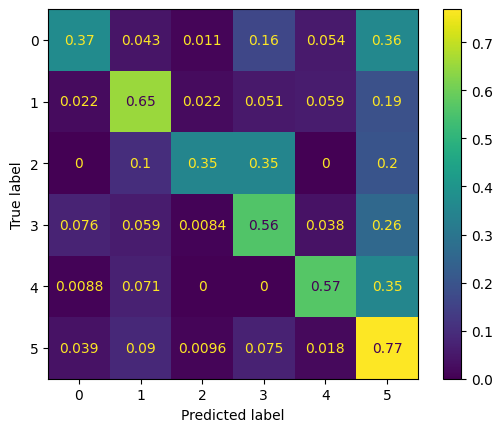

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = forest.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')

Train_Accuracy = forest.score(X_train_std, y_train)
Test_Accuracy = forest.score(X_test_std, y_test)

from sklearn.metrics import confusion_matrix
r = confusion_matrix(y_test, y_pred, normalize='true').diagonal(); print(f"Balanced accuracy = {r.mean():.3f} = ({' + '.join(f'{x:.2f}' for x in r)})/{r.size}")

Overfiting_gap = Train_Accuracy - Test_Accuracy
print(f'Overfiting gap: {Overfiting_gap}')

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

Mapeo de etiquetas (El índice es el número, el valor es la etiqueta):
['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']
Datos listos. Tamaño de entrenamiento: (7651, 33), Tamaño de prueba: (1913, 33)
Ensamble de modelos definido.

Iniciando entrenamiento del ensamble de stacking...
Entrenamiento completado.
Modelo guardado en el archivo: exoplanet_stacking_model.pkl

Evaluando el modelo en el conjunto de prueba...

Precisión (Accuracy): 0.8421

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       396
           1       0.85      0.86      0.86       549
           2       0.88      0.91      0.89       968

    accuracy                           0.84      1913
   macro avg       0.82      0.81      0.81      1913
weighted avg       0.84      0.84      0.84      1913


Matriz de Confusión (Conteos Absolutos):
[[260  48  88]
 [ 43 473  33]
 [ 57  33 878]]


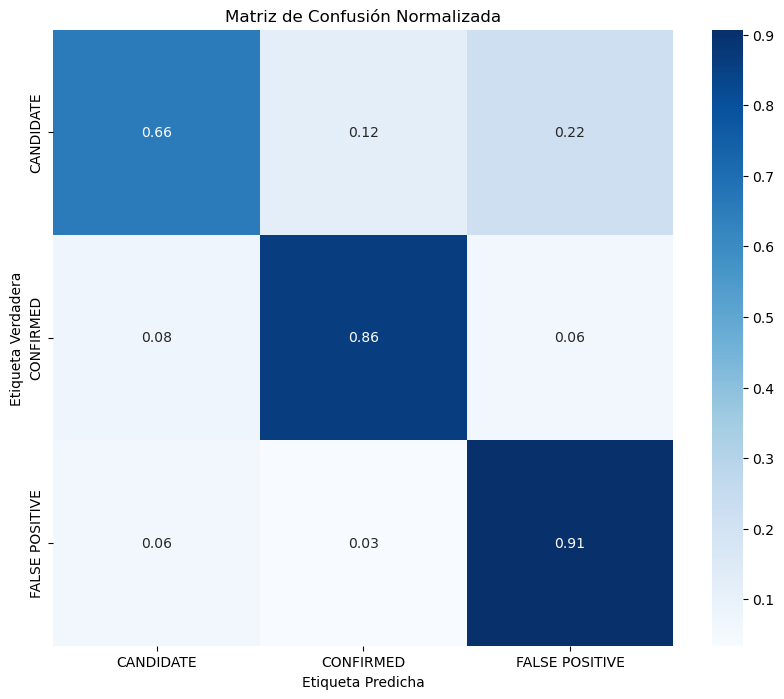

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


X = final_df.drop('tfopwg_disp', axis=1)
y_text = final_df['tfopwg_disp']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_text)

print("Mapeo de etiquetas (El índice es el número, el valor es la etiqueta):")
print(list(label_encoder.classes_))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)
print(f"Datos listos. Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")

# 4. DEFINICIÓN Y CREACIÓN DEL ENSAMBLE DE MODELOS



# Modelo 1: XGBoost
model1 = best_xgb_model

# Modelo 2: SVM con escalado de datos
model2 = best_svm_model

# Modelo 3: Red Neuronal con escalado de datos
model3 = best_mlp_model

# --- Meta-Modelo (Capa 1) ---
meta_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# --- Creación del Ensamble con StackingCVClassifier ---
stacking_model = StackingCVClassifier(
    classifiers=[model1, model2, model3],
    meta_classifier=meta_model,
    use_probas=True,
    cv=5,
    random_state=42,
    n_jobs=-1 # Usar todos los núcleos de CPU disponibles
)
print("Ensamble de modelos definido.")

# 5. ENTRENAMIENTO DEL MODELO
print("\nIniciando entrenamiento del ensamble de stacking...")
stacking_model.fit(X_train, y_train)
print("Entrenamiento completado.")

# 6. GUARDADO DEL MODELO ENTRENADO
model_filename = 'exoplanet_stacking_model.pkl'
joblib.dump(stacking_model, model_filename)
print(f"Modelo guardado en el archivo: {model_filename}")

# 7. EVALUACIÓN DEL MODELO
#print("\nEvaluando el modelo en el conjunto de prueba...")
#y_pred = stacking_model.predict(X_test)

# Calcular y mostrar métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy): {accuracy:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión (Conteos Absolutos):")
print(confusion_matrix(y_test, y_pred))

class_names = label_encoder.classes_ 

# 2. Calcula la matriz de confusión normalizada
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# 3. Crea la figura y el mapa de calor
plt.figure(figsize=(10, 8)) 
heatmap = sns.heatmap(
    cm_normalized, 
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=class_names, 
    yticklabels=class_names
)

plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión Normalizada')
plt.show()

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 4. AJUSTE DE HIPERPARÁMETROS PARA XGBOOST

X = final_df.drop('tfopwg_disp', axis=1)
y_text = final_df['tfopwg_disp']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_text)

print("Mapeo de etiquetas (El índice es el número, el valor es la etiqueta):")
print(list(label_encoder.classes_))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)
print(f"Datos listos. Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")
# --- Paso 1: Definir el espacio de búsqueda de parámetros ---
# Aquí definimos los rangos de valores que queremos probar para cada hiperparámetro.
param_grid = {
    'n_estimators': [100, 200, 300, 400], # Número de árboles en el bosque
    'max_depth': [3, 4, 5, 6, 7],         # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.7, 0.8, 0.9, 1.0],      # Porcentaje de muestras usadas por árbol
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Porcentaje de características usadas por árbol
    'gamma': [0, 0.1, 0.2]                  # Parámetro de regularización
}

# --- Paso 2: Configurar la Búsqueda Aleatoria ---
# Creamos el modelo base de XGBoost que vamos a optimizar
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Configuramos RandomizedSearchCV
# n_iter: Número de combinaciones aleatorias a probar. 50 es un buen punto de partida.
# cv: Número de pliegues para la validación cruzada. 5 es estándar.
# scoring: La métrica que queremos maximizar. 'f1_weighted' es ideal para tus datos.
# n_jobs: -1 para usar todos los núcleos de tu CPU y acelerar el proceso.
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1  # Muestra el progreso
)

# --- Paso 3: Ejecutar la Búsqueda ---

print("\nIniciando búsqueda de hiperparámetros para XGBoost...")
random_search.fit(X_train, y_train)

# --- Paso 4: Obtener los Mejores Parámetros ---
print("\nBúsqueda completada.")
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

# Guardamos el mejor modelo encontrado
best_xgb_model = random_search.best_estimator_

Mapeo de etiquetas (El índice es el número, el valor es la etiqueta):
['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']
Datos listos. Tamaño de entrenamiento: (7651, 33), Tamaño de prueba: (1913, 33)

Iniciando búsqueda de hiperparámetros para XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Búsqueda completada.
Mejores parámetros encontrados:
{'subsample': 0.8, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# OPTIMIZACIÓN DE HIPERPARÁMETROS PARA SVM

# --- Paso 1: Definir el Pipeline y el Espacio de Búsqueda ---
# Es CRUCIAL escalar los datos para el SVM, por eso lo metemos en un Pipeline.
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

# Definimos el espacio de búsqueda. 'svm__' es el prefijo para acceder a los parámetros del paso 'svm' en el pipeline.
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svm__kernel': ['rbf'] # El kernel radial (rbf) es el más común y potente
}

# --- Paso 2: Configurar y Ejecutar la Búsqueda Aleatoria ---
random_search_svm = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=param_grid_svm,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\nIniciando búsqueda de hiperparámetros para SVM...")
random_search_svm.fit(X_train, y_train)

# --- Paso 3: Obtener el Mejor Modelo SVM ---
print("\nBúsqueda completada para SVM.")
print("Mejores parámetros encontrados:")
print(random_search_svm.best_params_)
best_svm_model = random_search_svm.best_estimator_


Iniciando búsqueda de hiperparámetros para SVM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Búsqueda completada para SVM.
Mejores parámetros encontrados:
{'svm__kernel': 'rbf', 'svm__gamma': 'scale', 'svm__C': 100}


In [10]:
from sklearn.neural_network import MLPClassifier

# OPTIMIZACIÓN DE HIPERPARÁMETROS PARA MLP

# --- Paso 1: Definir el Pipeline y el Espacio de Búsqueda ---
# La Red Neuronal también necesita datos escalados.
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1500, random_state=42)) # Aumentamos las iteraciones
])

# Definimos arquitecturas de red y parámetros de aprendizaje a probar.
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__activation': ['relu', 'tanh']
}

# --- Paso 2: Configurar y Ejecutar la Búsqueda Aleatoria ---
random_search_mlp = RandomizedSearchCV(
    estimator=mlp_pipeline,
    param_distributions=param_grid_mlp,
    n_iter=20, # Probaremos 20 arquitecturas y configuraciones
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\nIniciando búsqueda de hiperparámetros para MLP...")
random_search_mlp.fit(X_train, y_train)

# --- Paso 3: Obtener el Mejor Modelo MLP ---
print("\nBúsqueda completada para MLP.")
print("Mejores parámetros encontrados:")
print(random_search_mlp.best_params_)
best_mlp_model = random_search_mlp.best_estimator_


Iniciando búsqueda de hiperparámetros para MLP...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Búsqueda completada para MLP.
Mejores parámetros encontrados:
{'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (50,), 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}


In [2]:

useless_columns_KOI = [
    'kepid', 'rowid', 'koi_datalink_dvr', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
    'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_parm_prov', 'koi_sparprov',
    'koi_vet_stat', 'koi_vet_date', 'koi_comment', 'koi_tce_delivname', 'koi_tce_plnt_num', 'ra', 'dec',
    'koi_quarters', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1',
    'koi_time0_err2', 'koi_limbdark_mod', 'koi_fittype', 'koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec',
    'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 'koi_dikco_mra_err',
    'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 'koi_dikco_msky_err', 'koi_fwm_stat_sig', 'koi_fwm_sra',
    'koi_fwm_sra_err', 'koi_fwm_sdec', 'koi_fwm_sdec_err', 'koi_fwm_srao', 'koi_fwm_srao_err', 'koi_fwm_sdeco',
    'koi_fwm_sdeco_err', 'koi_fwm_prao', 'koi_fwm_prao_err', 'koi_fwm_pdeco', 'koi_fwm_pdeco_err', 'koi_period_err1',
    'koi_period_err2', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp_err1', 'koi_longp_err2', 'koi_impact_err1',
    'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_ingress_err1', 'koi_ingress_err2',
    'koi_depth_err1', 'koi_depth_err2', 'koi_ror_err1', 'koi_ror_err2', 'koi_srho_err1', 'koi_srho_err2',
    'koi_prad_err1', 'koi_prad_err2', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq_err1',
    'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_dor_err1', 'koi_dor_err2', 'koi_steff_err1',
    'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad_err1',
    'koi_srad_err2', 'koi_smass_err1', 'koi_smass_err2', 'koi_sage_err1', 'koi_sage_err2', 'koi_sage', 'koi_model_dof',
    'koi_ingress', 'koi_model_chisq', 'koi_longp', 'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_trans_mod', 'koi_datalink_dvr',
    'koi_datalink_dvs'
]

useful_columns_KOI = [
    'koi_period', 'koi_duration', 'koi_depth', 'koi_model_snr', 'koi_impact', 'koi_ror', 'koi_prad', 'koi_sma',
    'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_smet', 'koi_smass', 'koi_srho', 'koi_kepmag',
    'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag', 'koi_incl', 'koi_dor',
]

In [3]:
df_KOI = KOI_raw_data.drop(columns=useless_columns_KOI)
df_KOI

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,...,koi_srad,koi_smass,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,CONFIRMED,9.488036,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,...,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,CONFIRMED,54.418383,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,...,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
2,CANDIDATE,19.899140,0.969,1.78220,10829.0,0.154046,7.29555,14.60,0.1419,88.96,...,0.868,0.961,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826
3,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,...,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,CONFIRMED,2.525592,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,...,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,0.297633,0.16318,29.35,0.0128,20.78,...,0.903,1.005,14.082,14.082,13.501,13.299,13.177,12.200,11.814,11.756
9560,CANDIDATE,1.739849,0.043,3.11400,48.5,0.006379,0.50770,0.72,0.0290,89.42,...,1.031,1.075,14.757,15.189,14.687,14.571,14.484,13.641,13.339,13.261
9561,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,0.009444,8.97692,1.07,0.0157,88.60,...,1.041,1.104,15.385,15.853,15.347,15.185,15.158,14.220,13.913,13.844
9562,CANDIDATE,333.486169,0.214,3.19900,639.1,0.022590,85.88623,19.30,1.2233,89.98,...,7.824,2.190,10.998,11.733,10.880,10.682,10.578,9.501,9.027,8.921


In [4]:
# Convert into dummies the categorical target
original_columns = df_KOI.columns
df_KOI_encoded = pd.get_dummies(df_KOI, columns=['koi_disposition'], dummy_na=False, prefix='state')

# Impute the missing Data

imputer = IterativeImputer(max_iter=10, random_state=0)
df_KOI_imputado = pd.DataFrame(imputer.fit_transform(df_KOI_encoded), columns=df_KOI_encoded.columns)
print(df_KOI_imputado)

encoded_columns = [col for col in df_KOI_imputado.columns if col.startswith('state_')]

columnas_originales = [col for col in df_KOI_imputado.columns if col not in encoded_columns]

decoded_series = df_KOI_imputado[encoded_columns].idxmax(axis=1)

df_KOI['tfopwg_disp_imputed'] = decoded_series.str.replace('state_', '')

final_df = df_KOI_imputado[columnas_originales].copy()
final_df['tfopwg_disp'] = df_KOI['tfopwg_disp_imputed']

      koi_period  koi_impact  koi_duration  koi_depth   koi_ror  koi_srho  \
0       9.488036       0.146       2.95750      615.8  0.022344   3.20796   
1      54.418383       0.586       4.50700      874.8  0.027954   3.02368   
2      19.899140       0.969       1.78220    10829.0  0.154046   7.29555   
3       1.736952       1.276       2.40641     8079.2  0.387394   0.22080   
4       2.525592       0.701       1.65450      603.3  0.024064   1.98635   
...          ...         ...           ...        ...       ...       ...   
9559    0.527699       1.252       3.22210     1579.2  0.297633   0.16318   
9560    1.739849       0.043       3.11400       48.5  0.006379   0.50770   
9561    0.681402       0.147       0.86500      103.6  0.009444   8.97692   
9562  333.486169       0.214       3.19900      639.1  0.022590  85.88623   
9563    4.856035       0.134       3.07800       76.7  0.008076   1.40645   

      koi_prad  koi_sma  koi_incl  koi_teq  ...  koi_gmag  koi_rmag  koi_im

/Users/sebastian/anaconda3/envs/nasa_env/lib/python3.9/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
conda install -c conda-forge astropy

Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (/Users/sebastian/anaconda3/lib/python3.11/site-packages/conda/plugins/types.py))
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
/ DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
- DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/current_repodata.json HTTP/1.1" 200 None
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 